___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*

    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Demand Prediction

- Inverse Transform
- Plot Prediction
- Calculate Train and Test Error Scores



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import tensorflow as tf
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [4]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df).sort_values(by='Nulls', ascending=False))

Data shape: (17414, 10)
___________________________
Data Types:
float64    8
int64      1
object     1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
cnt,int64,17414,3781,0,0,7860
hum,float64,17414,143,0,20.5,100.0
is_holiday,float64,17414,2,0,0.0,1.0
is_weekend,float64,17414,2,0,0.0,1.0
season,float64,17414,4,0,0.0,3.0
t1,float64,17414,73,0,-1.5,34.0
t2,float64,17414,82,0,-6.0,34.0
timestamp,object,17414,17414,0,2015-01-04 00:00:00,2017-01-03 23:00:00
weather_code,float64,17414,7,0,1.0,26.0
wind_speed,float64,17414,103,0,0.0,56.5


* timestamp type i object, bunu datetime64 tipine cevirecegiz.
* timestamp in tum degerleri unique oldugundan bu sutunu datasetine index olarak assign edelim.

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.set_index('timestamp',inplace=True)
df.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
cols=['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season']

In [8]:
print('Unique Values of Each Features:\n')
for i in cols:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

t1:
[-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.333333333333334, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0]

t2:
[-6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.333333333333334, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0]

hum:
[20.5, 23.0, 23.5, 24.0, 25.0, 2

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog

**Summary Tasks** 
- When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.  
- Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.

> **divide the data into time steps and transform it**

> **visualize the distribution of bike shares by day of the week, hour, month, season**

> **analyze correlation of variables with a heatmap**

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [9]:
f=lambda x: x.strftime('%Y-%m') # strftime works with array
df['year_month']=  f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [10]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [11]:
# sns.pairplot(df)

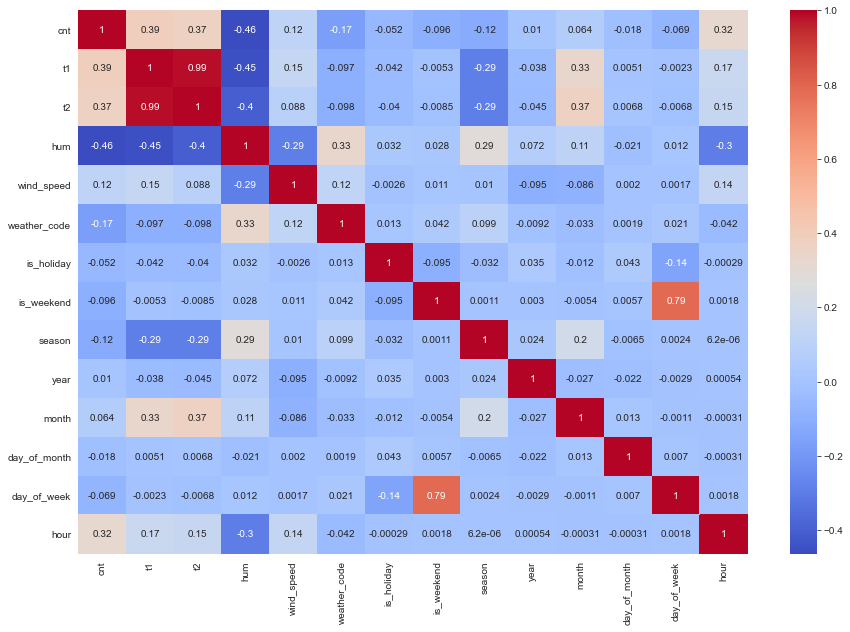

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

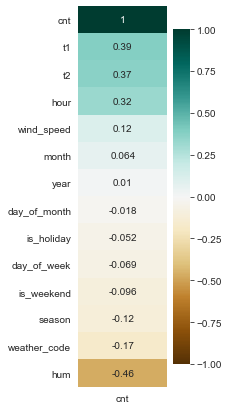

In [13]:
plt.figure(figsize=(2, 7))
sns.heatmap(df.corr()[['cnt']].sort_values(by='cnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');

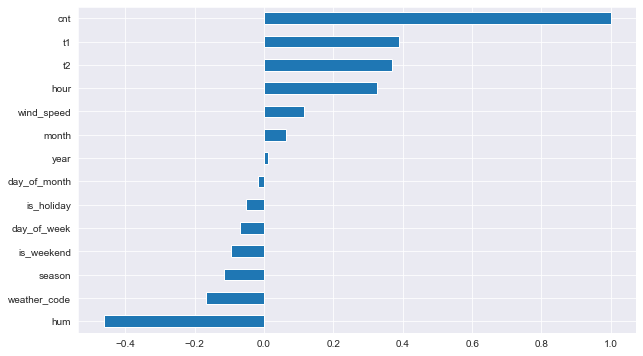

In [14]:
plt.figure(figsize=(10,6))
df.corr()["cnt"].sort_values().plot.barh();

### Plot Breakdowns of Data

***i. Plot bike shares over time***

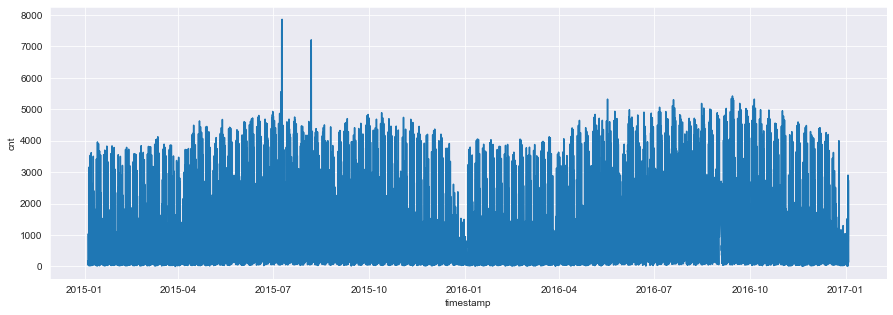

In [15]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='cnt',data=df)
plt.show()

***ii. Plot bike shares by months***

In [16]:
df_sum=pd.DataFrame(df.groupby('year_month').cnt.sum())

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cnt,814.7,810.1,941.7,1156.6,1203.5,1441.1,1514.4,1389.7,1255.2,1175.3,...,1069.3,1346.7,1324.6,1572.9,1536.9,1462.1,1259.4,978.9,876.2,523.3


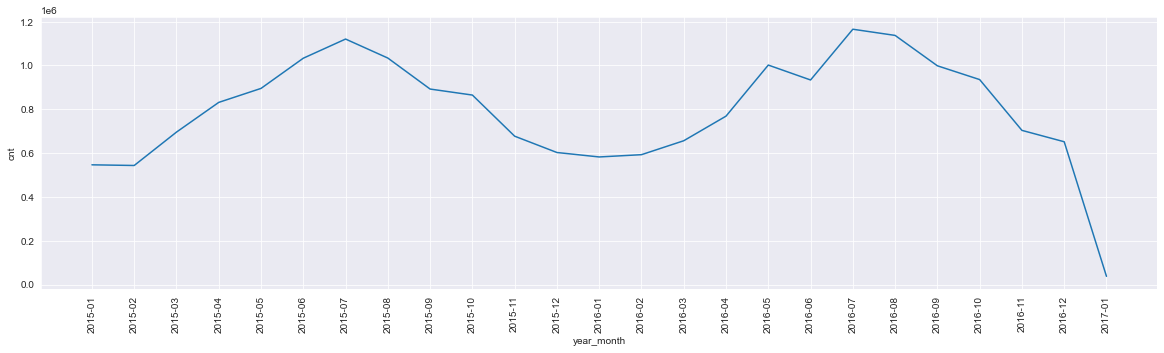

In [17]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year_month', y='cnt',data=df_sum)
plt.xticks(rotation=90)
pd.DataFrame(df.groupby('year_month').cnt.mean().apply(lambda x:round(x,1))).reset_index(drop=True).T

month,1,2,3,4,5,6,7,8,9,10,11,12
cnt,784.7,836.3,921.3,1113.0,1275.1,1383.4,1543.7,1463.1,1356.6,1217.5,965.9,845.5


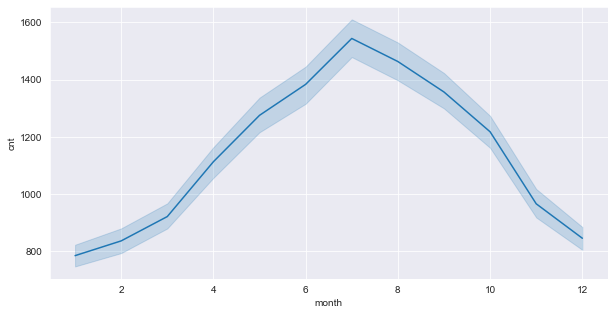

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='cnt',data=df)
pd.DataFrame(df.groupby('month').cnt.mean().apply(lambda x:round(x,1))).T

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cnt,290.6,200.6,136.3,94.2,73.3,110.7,466.6,1468.7,2882.8,1653.0,...,1472.0,1564.6,1869.8,2829.6,2629.0,1651.5,1059.8,741.2,592.4,439.7


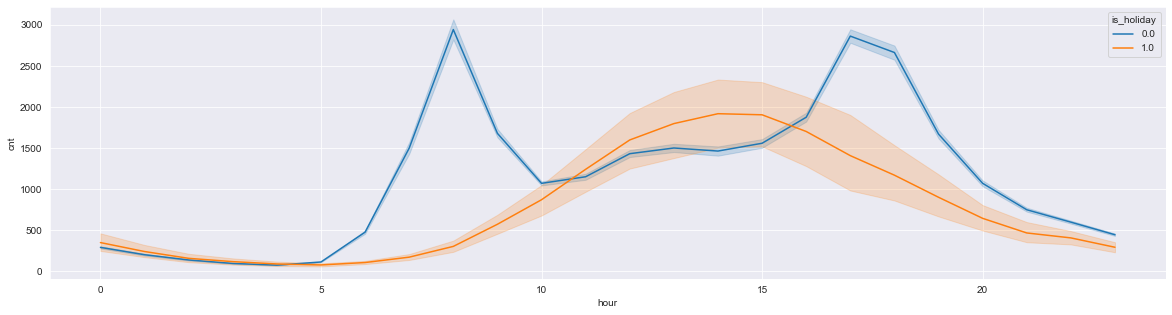

In [19]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='hour', y='cnt',data=df, hue='is_holiday')
pd.DataFrame(df.groupby('hour').cnt.mean().apply(lambda x:round(x,1))).T

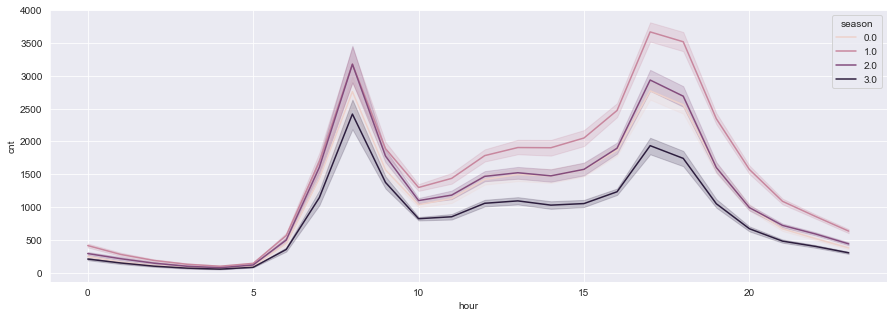

In [20]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='hour', y='cnt',data=df, hue='season')
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

day_of_week,0,1,2,3,4,5,6
cnt,1130.3,1230.1,1244.4,1258.8,1182.8,995.6,959.6


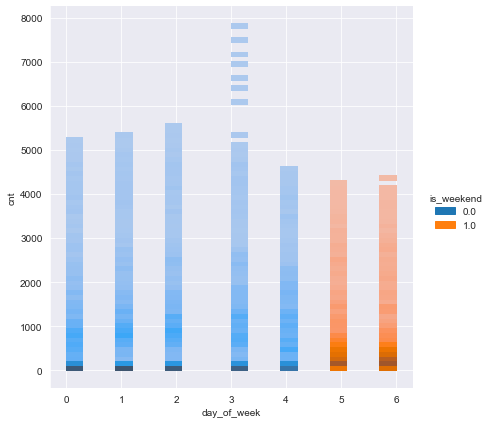

In [21]:
sns.displot(x='day_of_week', y='cnt',data=df, hue='is_weekend',height=6)
pd.DataFrame(df.groupby('day_of_week').cnt.mean().apply(lambda x:round(x,1))).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


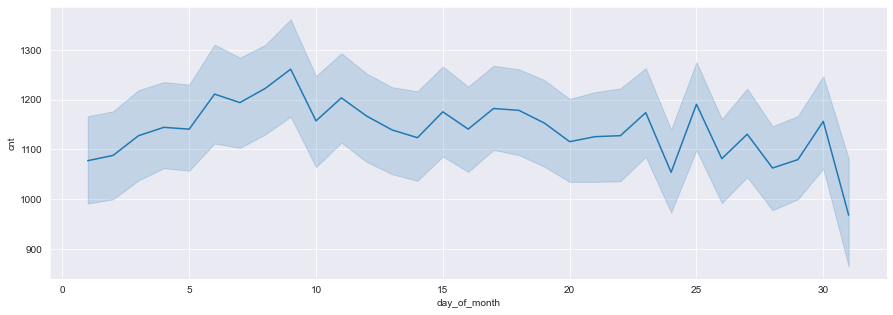

In [22]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='day_of_month', y='cnt',data=df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x:round(x))).T

***v. Plot the distribution of bike shares on holidays by seasons***

is_weekend,0.0,1.0
cnt,1209.3,977.4


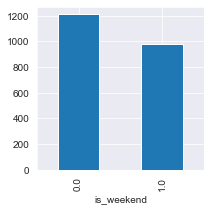

In [23]:
plt.figure(figsize=(3, 3))
df.groupby('is_weekend').cnt.mean().plot.bar();
pd.DataFrame(df.groupby('is_weekend').cnt.mean().apply(lambda x:round(x,1))).T


weather_code,1.0,2.0,3.0,4.0,7.0,10.0,26.0
cnt,1162.1,1496.2,1195.1,635.2,713.0,583.4,250.8


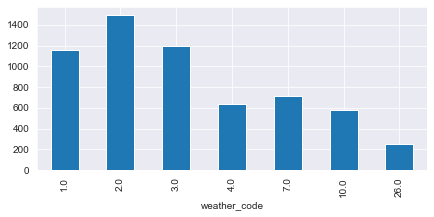

In [24]:
plt.figure(figsize=(7, 3))
df.groupby('weather_code').cnt.mean().plot.bar();
pd.DataFrame(df.groupby('weather_code').cnt.mean().apply(lambda x:round(x,1))).T

In [25]:
df.drop('year_month',axis=1,inplace=True)

In [26]:
df.drop('year',axis=1,inplace=True)

* 'year' in target label ile alakasi yok. drop edilir.
* 'year_month' u visualization da kullanmak icin gecici olarak create etmistik, drop edilir.

---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [27]:
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1


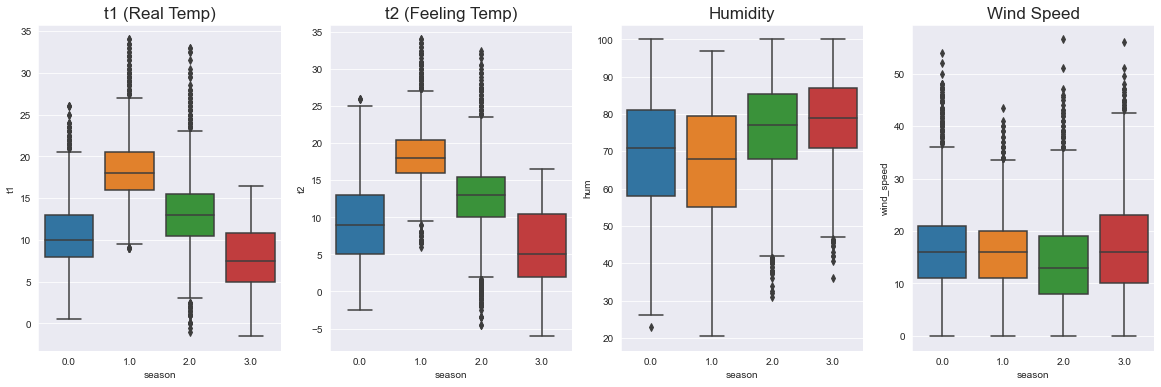

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(df['season'], df['t1'])
plt.title("t1 (Real Temp)",fontdict={'fontsize':17})

plt.subplot(1,4,2)
sns.boxplot(df['season'], df['t2'])
plt.title("t2 (Feeling Temp)",fontdict={'fontsize':17})

plt.subplot(1,4,3)
sns.boxplot(df['season'], df['hum'])
plt.title("Humidity",fontdict={'fontsize':17})

plt.subplot(1,4,4)
sns.boxplot(df['season'], df['wind_speed'])
plt.title("Wind Speed",fontdict={'fontsize':17})
plt.show()

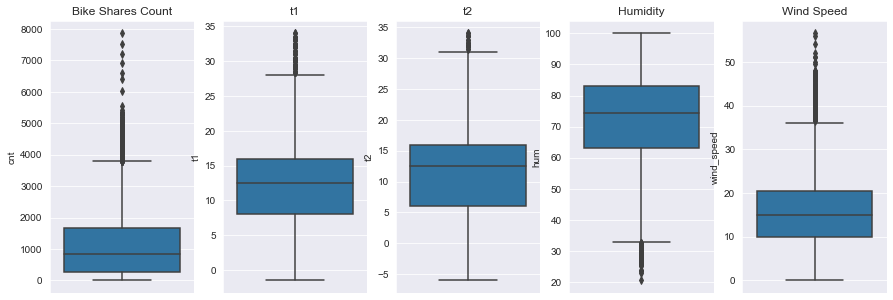

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,5,1)
sns.boxplot(y=df['cnt'])
plt.title('Bike Shares Count')

plt.subplot(1,5,2)
sns.boxplot(y=df['t1'])
plt.title('t1')

plt.subplot(1,5,3)
sns.boxplot(y=df['t2'])
plt.title('t2')

plt.subplot(1,5,4)
sns.boxplot(y=df['hum'])
plt.title('Humidity')

plt.subplot(1,5,5)
sns.boxplot(y=df['wind_speed'])
plt.title('Wind Speed')
plt.show()

In [30]:
def col_plot(df,col_name,iqr=1.5):
    plt.figure(figsize=(18,5))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name], whis = iqr)
    plt.xlabel(f"IQR={iqr}")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = iqr)
    plt.xlabel(f"ROOT SQUARE - IQR={iqr}")

    plt.subplot(144)
    
    plt.boxplot(np.log(df[col_name]-min(df[col_name])+1), whis = iqr)
    plt.xlabel(f"LOGARITMIC - IQR={iqr}")
    plt.show()

* cnt, target label oldugu icin outlier analizine katmiyoruz.

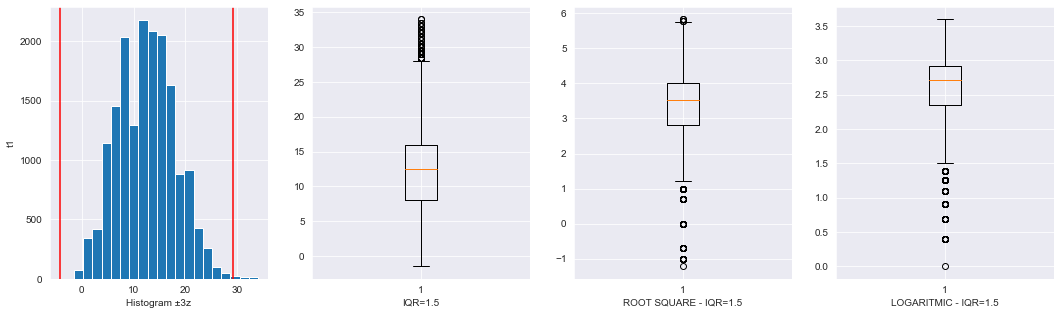

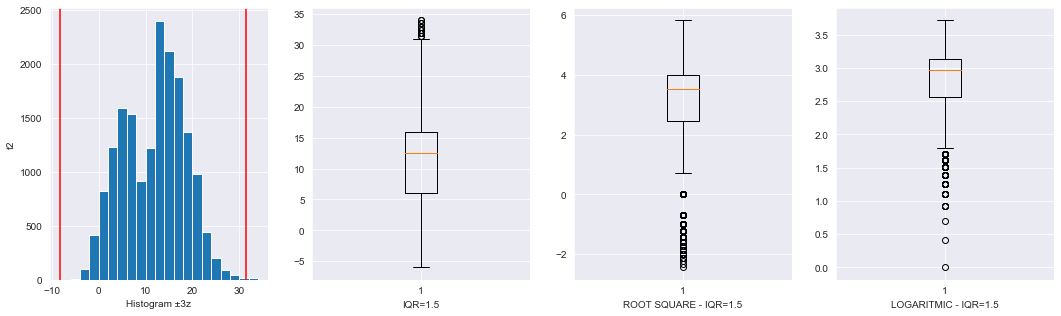

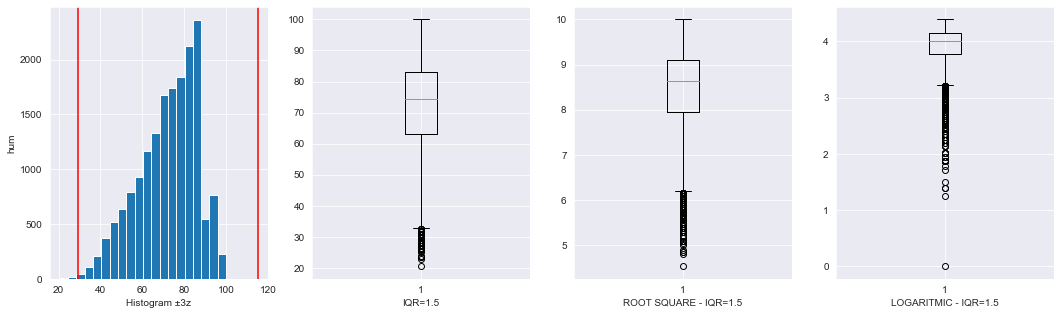

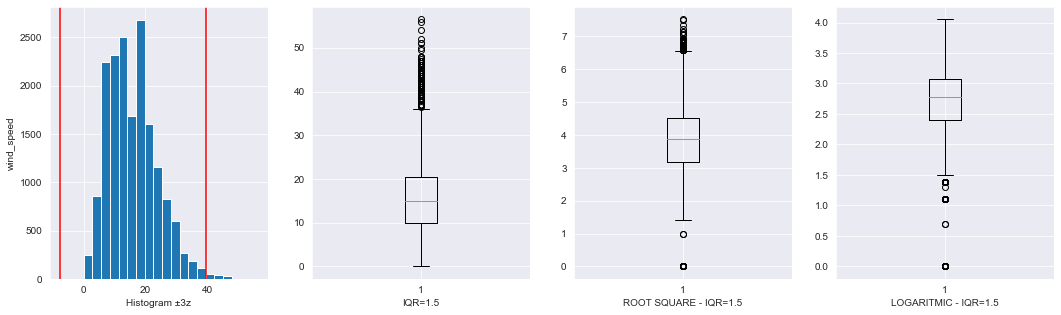

In [31]:
df_eda=df[['t1', 't2', 'hum', 'wind_speed']]

for i in df_eda:
    col_plot(df_eda,i,1.5)

In [32]:
from scipy.stats.mstats import winsorize
# Ayrintili bilgi icin:
# http://tiny.cc/pnngtz

def plot_winsorize(df,col_name,up=0.05,down=0):
    plt.figure(figsize = (18, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]-min(df[col_name])+1)

    plt.subplot(141)
    plt.hist(winsor, bins = 20)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=25)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show() 

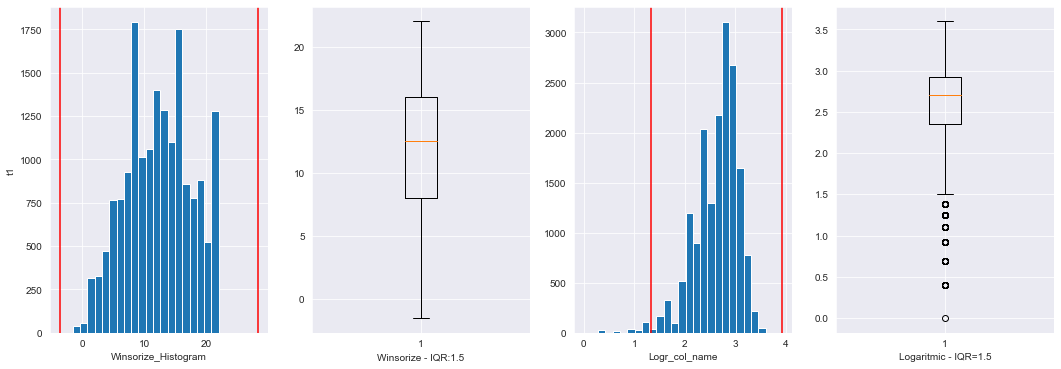

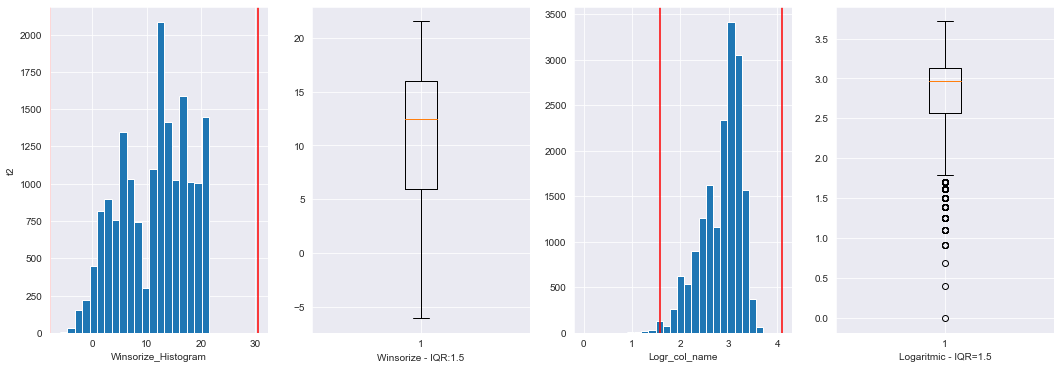

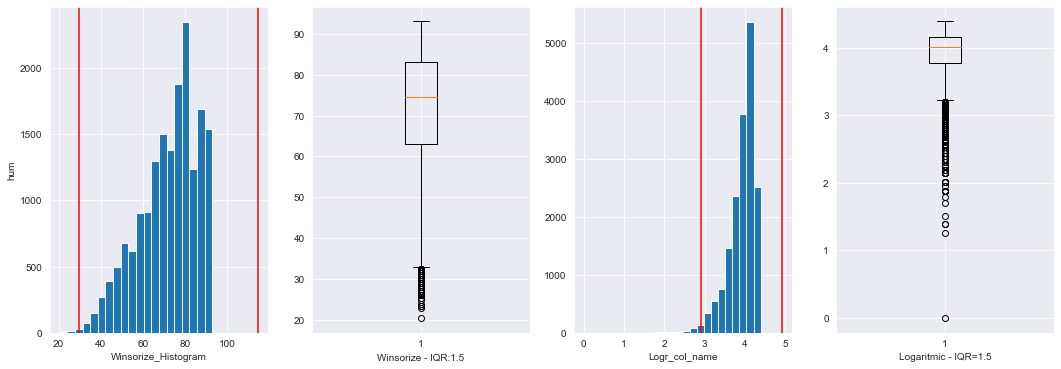

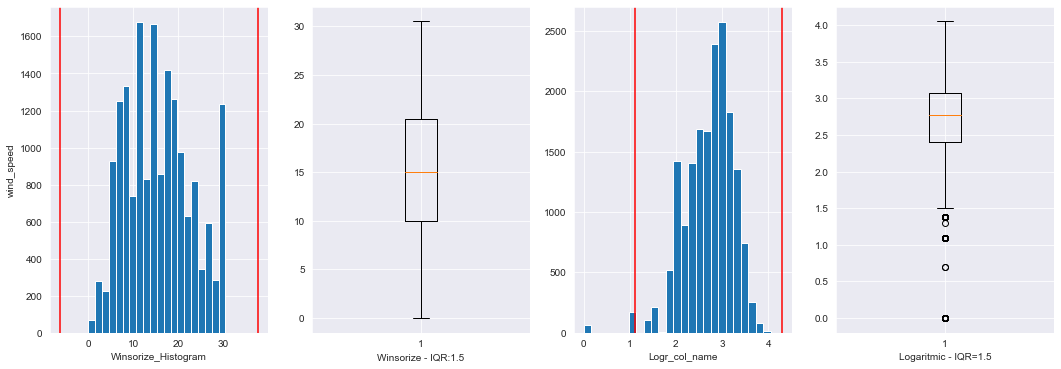

In [33]:
for i in df_eda:
    plot_winsorize(df_eda,i)

In [34]:
features=[
#         'cnt', 
        't1', 't2', 'hum', 'wind_speed', 
#           'weather_code', 'is_holiday','is_weekend', 'season', 'year_month', 
#           'year', 'month', 'day_of_month','day_of_week', 'hour',
         ]

In [35]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.05))

In [36]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [37]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [38]:
k=1.5
print(f"Number of Outliers for {k}*IQR\n")


total=0
for col in features:
    if detect_outliers(df_eda, col)[2] > 0:
        outliers=detect_outliers(df_eda, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 1.5*IQR

64 outliers in 't1'
19 outliers in 't2'
71 outliers in 'hum'
236 outliers in 'wind_speed'

390 OUTLIERS TOTALLY


In [39]:
k=1.5
print(f"Number of Outliers for {k}*IQR\n")


total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 1.5*IQR

71 outliers in 'hum'

71 OUTLIERS TOTALLY


In [40]:
df_winsorised.shape

(17414, 13)

In [41]:
iqr=1.5
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,iqr)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [42]:
df_winsorised.shape

(17328, 13)

In [43]:
17414 - 17328

86

---
---

## 2. Data Pre-Processing


### Train - Test Split

Appropriately split the data for optimum training.

* Time series oldugu icin random sample almayiz.
* %10-%90 train-test verisi alalim.
* Noron sayisi ve time step arttikca model performansi genellikle artar.

In [67]:
train_len = round(len(df) *.9)
test_len = len(df) - train_len

train_len, test_len

(15673, 1741)

In [68]:
time_steps = 10
df_train = df.iloc[:train_len]
df_test = df.iloc[(train_len - time_steps):]

df.shape, df_train.shape, df_test.shape

((17414, 13), (15673, 13), (1751, 13))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1', 't2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

* **Robust Scaler**: Normalizasyon ile benzer şekilde çalışır. Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir. Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. kartil aralığına oturtulur.
* Ayrinti bilgi icin: http://tiny.cc/uzngtz

In [69]:
features=[
#         'cnt', 
        't1', 't2', 'hum', 'wind_speed', 
#           'weather_code', 'is_holiday','is_weekend', 'season', 
#           'year_month', 'year', 'month', 'day_of_month','day_of_week', 'hour',
         ]

In [70]:
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import RobustScaler

scaler_X = RobustScaler().fit(df_train[features])
df_train[features] = scaler_X.transform(df_train[features])
df_test[features] = scaler_X.transform(df_test[features])

In [71]:
scaler_y = RobustScaler().fit(df_train[['cnt']])
df_train['cnt'] = scaler_y.transform(df_train[['cnt']])
df_test['cnt'] = scaler_y.transform(df_test[['cnt']])

* Scaling yaparken fit islemi train datasinda yapilmalidir. test datasinda yalniz transform yapilmali, test datasindan prensib olarak birsey ogrenilmemelidir.|

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [72]:
def generator(df,col,time_steps):
    x, y = [],[]
    
    for i in range(len(df) - time_steps):
        x.append(df.drop(columns=col).iloc[i:i + time_steps].to_numpy())
        y.append(df.loc[:,col].iloc[i + time_steps])
    
    return np.array(x), np.array(y)

In [73]:
X_train, y_train = generator(df_train, 'cnt', time_steps)
X_test, y_test = generator(df_test, 'cnt', time_steps)

In [74]:
print(f"""X_train\t: {X_train.shape}
y_train\t: {y_train.shape}
\nX_test\t: {X_test.shape}
y_test\t: {y_test.shape}""")

X_train	: (15663, 10, 12)
y_train	: (15663,)

X_test	: (1741, 10, 12)
y_test	: (1741,)


In [75]:
y_test = df.loc[:,'cnt'].iloc[train_len:len(df)].to_numpy()

---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






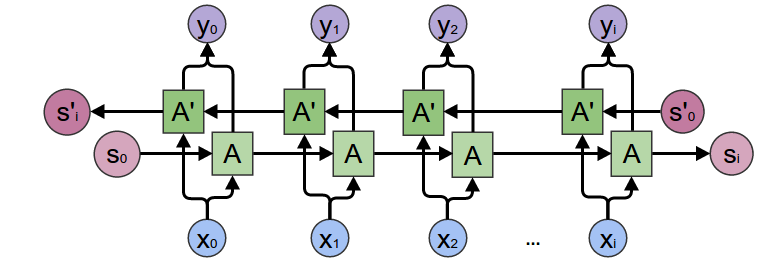

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [76]:
from tensorflow.keras.layers import Bidirectional,Dropout,Dense,LSTM
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,History

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score

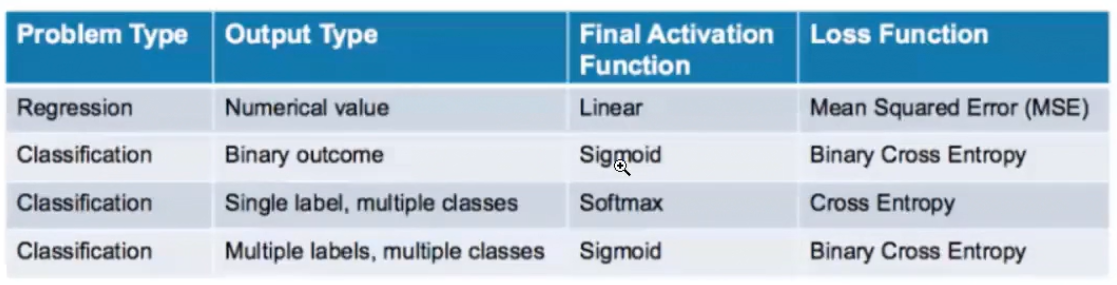

In [88]:
X_train.shape

(15663, 10, 12)

In [89]:
model = Sequential()
# 12 feature var, unit 12 seceriz.
model.add(Bidirectional(LSTM(12,input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='mean_squared_error')
# early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [90]:
history = History()
model.fit(X_train, y_train, 
          epochs=200,
          batch_size=256, 
          validation_split=0.15,
          validation_data=(X_test,y_test),
          verbose=1,
#           callbacks=[early_stop],
          callbacks=[history],
          shuffle=True,
         )

Epoch 1/200
53/53 [==============================] - 5s 31ms/step - loss: 0.9351 - val_loss: 0.8067
Epoch 2/200
53/53 [==============================] - 0s 7ms/step - loss: 0.5446 - val_loss: 0.6285
Epoch 3/200
53/53 [==============================] - 0s 6ms/step - loss: 0.4604 - val_loss: 0.5372
Epoch 4/200
53/53 [==============================] - 0s 6ms/step - loss: 0.3672 - val_loss: 0.4601
Epoch 5/200
53/53 [==============================] - 0s 6ms/step - loss: 0.3277 - val_loss: 0.3960
Epoch 6/200
53/53 [==============================] - 0s 5ms/step - loss: 0.2972 - val_loss: 0.3529
Epoch 7/200
53/53 [==============================] - 0s 5ms/step - loss: 0.2694 - val_loss: 0.3198
Epoch 8/200
53/53 [==============================] - 0s 6ms/step - loss: 0.2624 - val_loss: 0.2960
Epoch 9/200
53/53 [==============================] - 0s 6ms/step - loss: 0.2360 - val_loss: 0.2663
Epoch 10/200
53/53 [==============================] - 0s 6ms/step - loss: 0.2207 - val_loss: 0.2437
Epoch 11

53/53 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.0644
Epoch 84/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0516 - val_loss: 0.0578
Epoch 85/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0508 - val_loss: 0.0634
Epoch 86/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0506 - val_loss: 0.0623
Epoch 87/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0537 - val_loss: 0.0675
Epoch 88/200
53/53 [==============================] - 0s 5ms/step - loss: 0.0537 - val_loss: 0.0635
Epoch 89/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0522 - val_loss: 0.0572
Epoch 90/200
53/53 [==============================] - 0s 7ms/step - loss: 0.0580 - val_loss: 0.0677
Epoch 91/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0603 - val_loss: 0.0640
Epoch 92/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0553 - val_loss: 0.0673
Epoch 93/200


### Plot Train and Validation Losses

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 24)                2400      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________


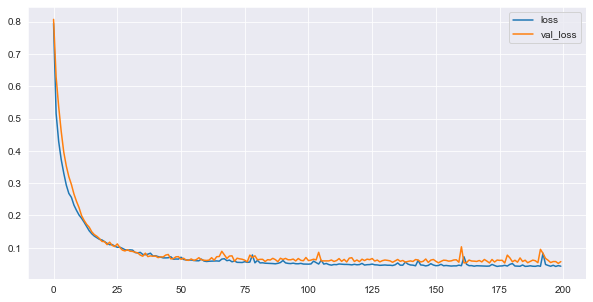

In [92]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(10, 5));

- valid ve loss üst üste geliyor, good fit.

---
---

## 4. Demand Predictions

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

### Inverse Transform

In [93]:
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

### Plot Prediction

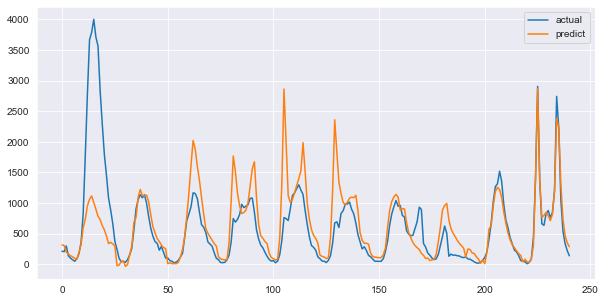

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[1500:2000], label='actual')
plt.plot(y_pred[1500:2000], label='predict')
plt.legend();

### Calculate Train and Test Error Scores

In [95]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [96]:
#Test Data
y_test_pred = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
eval_metrics(y_test, y_test_pred)

R2 Score: 0.8791949806402317
Mean Absolute Error(MAE): 187.00043115500813
Mean Square Error(MSE): 104301.05740094114
Root Mean Square Error(RMSE): 322.9567423060574


In [97]:
#Training Data
y_train_pred = model.predict(X_train)
y_py_train_predred = scaler_y.inverse_transform(y_train_pred)
eval_metrics(y_train, y_train_pred)

R2 Score: 0.9451300869521267
Mean Absolute Error(MAE): 0.10645577588022348
Mean Square Error(MSE): 0.031439780396815414
Root Mean Square Error(RMSE): 0.1773126628213998


In [99]:
explained_variance_score(y_test,y_test_pred)

0.8821734066959468

> **explained_variance_score**

> hata varyansi ile gercek degerin varyansi arasindaki orani hesaplamak icin kullanilan bir metrik. Modelin veri setindeki farkli varyasyonlari ne kadar iyi aciklayabildigini gosteren puandir. Genellikle 0,6 treshold uzeri olmasi beklenir.

In [100]:
y_test.shape, y_pred.shape

((1741,), (1741, 1))

In [129]:
my_dict={"Actual":y_test, 
         "Pred":y_pred.reshape(1741,)}

compare=pd.DataFrame(my_dict)
compare.sample(5)

,Actual,Pred
1219,622,520.010620
1058,1158,1046.147583
1130,1509,1141.887573
74,1084,1007.750610
1160,298,536.459412


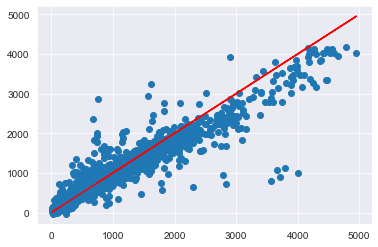

In [130]:
plt.scatter(compare.Actual,compare.Pred)
plt.plot(compare.Actual,compare.Actual,'r');

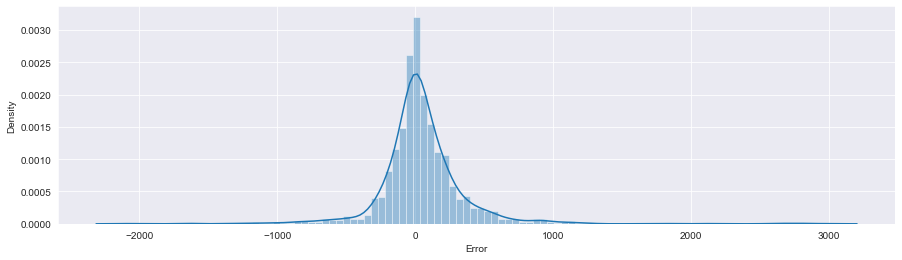

In [103]:
plt.figure(figsize=(15,4))
compare['Error'] = compare['Actual'] - compare['Pred']
sns.distplot(compare['Error'],kde=True,bins=100);

**Saving Model**

In [114]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
later_model = load_model('my_model.h5')

In [104]:
df.shape

(17414, 13)

In [131]:
df.iloc[-11:-1]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,
2017-01-03 13:00:00,878,-0.8750,-1.047619,-0.125,0.727273,4.0,0.0,0.0,3.0,1,3,1,13
2017-01-03 14:00:00,765,-0.8750,-1.047619,0.000,0.636364,3.0,0.0,0.0,3.0,1,3,1,14
2017-01-03 15:00:00,845,-0.8750,-1.047619,-0.125,1.090909,4.0,0.0,0.0,3.0,1,3,1,15
2017-01-03 16:00:00,1201,-0.8750,-1.047619,-0.125,1.000000,4.0,0.0,0.0,3.0,1,3,1,16
2017-01-03 17:00:00,2742,-0.8750,-1.047619,0.000,0.545455,3.0,0.0,0.0,3.0,1,3,1,17
2017-01-03 18:00:00,2220,-1.0000,-1.142857,0.375,0.636364,2.0,0.0,0.0,3.0,1,3,1,18
2017-01-03 19:00:00,1042,-1.0000,-1.142857,0.375,0.363636,3.0,0.0,0.0,3.0,1,3,1,19
2017-01-03 20:00:00,541,-1.0000,-1.142857,0.375,0.545455,4.0,0.0,0.0,3.0,1,3,1,20
2017-01-03 21:00:00,337,-0.9375,-1.095238,0.250,0.818182,4.0,0.0,0.0,3.0,1,3,1,21


In [132]:
sample = df.drop('cnt',axis=1).iloc[-11:-1]
sample = scaler_y.transform(sample.values.reshape(-1, 12))

In [133]:
# later_model.predict(sample)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___